In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit
import joblib


Preprocessing

In [4]:
df1=pd.read_csv('telco-customer.csv')

In [5]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check Missing Values

In [7]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check How data spreads :- like High Standard deviation or low

In [8]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Check Duplicates

In [10]:
df1.duplicated().sum()

np.int64(0)

Seperate Categorical and Numerical Columns

In [11]:
categorical_cols=df1.select_dtypes(include=['object','category']).columns.tolist()
numeric_cols=df1.select_dtypes(include=['int64','float64']).columns.tolist()

print(categorical_cols)
print(numeric_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [12]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check Outliers

In [14]:
numeric_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

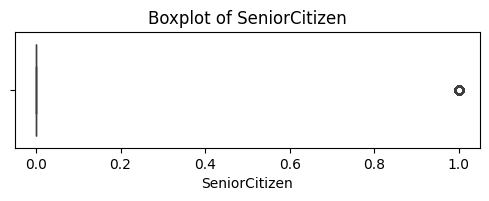

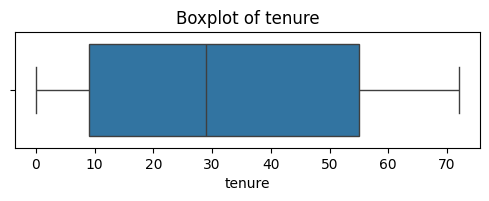

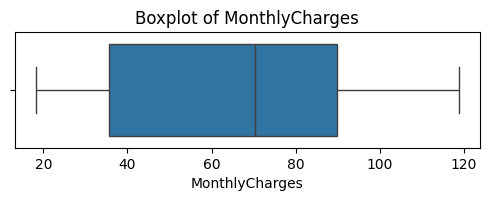

In [15]:
# ...existing code...

# Check Outliers: Create boxplots for all numerical columns
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# ...existing code...

Tenure Columns data's widely spread high standard deviation compare to little bit higher than Monthly Charges

SeniorCitizen Columns have Outliers

In [16]:
df1['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

So Senior Citizen Columns Like Yes or no type so no issues no need to consider as a outliers

In [17]:
df1['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
101.70     1
48.40      1
108.35     1
72.00      1
Name: count, Length: 1585, dtype: int64

In [18]:
df1['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Sampling Method
Pic Data From Sampling to get low biased data to perfect machine learning use Stratified Sampling - they Take All Possibility of Data's

Telecom Dataset have only 7000 dataset so use this all data no need sampling - if dataset have more than 10k that time only use stratified sampling

################################################################################################

Tenure Columns have below of 3 digit so need scaling, 

Monthly Charges Columns have 2 and 3 digits values have so using scaling

np.float64(-0.22052443394398033)

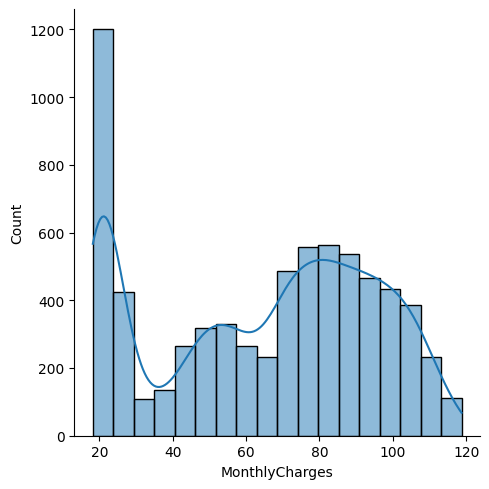

In [19]:
sns.displot(df1['MonthlyCharges'], kde=True)
df1['MonthlyCharges'].skew()

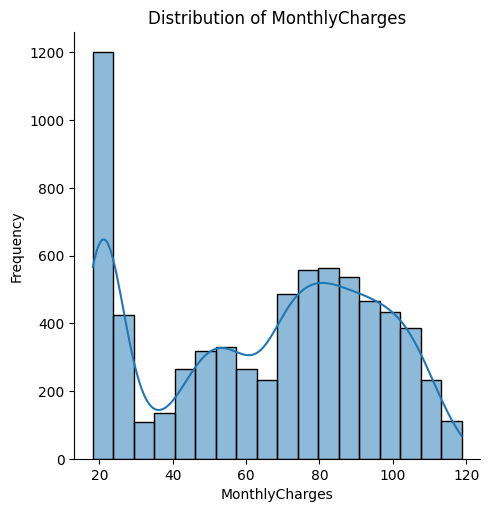

Skewness: -0.22
The distribution of MonthlyCharges is approximately normal.


In [ ]:
sns.displot(df1['MonthlyCharges'], kde=True)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()

skewness = df1['MonthlyCharges'].skew()
print(f"Skewness: {skewness:.2f}")

if abs(skewness) < 0.5:
    print("The distribution of MonthlyCharges is approximately normal.")
elif skewness >= 0.5:
    print("The distribution of MonthlyCharges is right-skewed (positively skewed).")
else:
    print("The distribution of MonthlyCharges is left-skewed (negatively skewed).")

Data is Normal Distribution so Use StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1['MonthlyCharges_scaled'] = scaler.fit_transform(df1[['MonthlyCharges']])

In [22]:
import joblib

In [ ]:
# Save the scaler for future use
joblib.dump(scaler, 'models/monthlycharges_scaler.pkl')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Charges in object change to float

In [25]:
# Convert 'TotalCharges' to float, handling errors
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Fill Missing Value of Total Charges using Median

In [28]:
# ...existing code...

# Fill missing values in 'TotalCharges' using the median
df1['TotalCharges'] = df1['TotalCharges'].fillna(df1['TotalCharges'].median())
# ...existing code...

In [29]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

np.float64(0.9637890936414893)

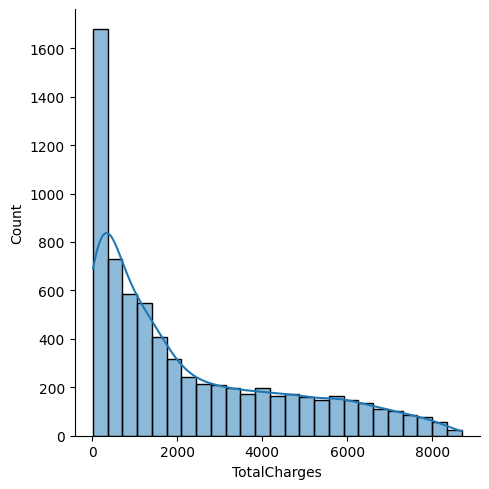

In [30]:
sns.displot(df1['TotalCharges'], kde=True)
df1['TotalCharges'].skew()

its Right Tail positively Skewed and not a normal distribution so Used as Minmax Scaller

In [31]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df1['TotalCharges_scaled'] = minmax_scaler.fit_transform(df1[['TotalCharges']])

# Optionally, save the scaler
joblib.dump(minmax_scaler, 'models/totalcharges_minmax_scaler.pkl')

['models/totalcharges_minmax_scaler.pkl']

In [32]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_scaled
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.215867
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330


So Now Removed MonthlyCharges Column

In [ ]:
df1.drop('MonthlyCharges', axis=1, inplace=True)

In [34]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_scaled
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.001275
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.215867
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.010310
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.210241
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.015330


Encoding

In [35]:
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [36]:
df1.drop('customerID', axis=1, inplace=True)

Total Charges Consider as a Numeric Column

In [37]:
df1['TotalCharges'].value_counts()

TotalCharges
20.200      11
1397.475    11
19.750       9
19.650       8
19.900       8
            ..
1990.500     1
7362.900     1
346.450      1
306.600      1
108.150      1
Name: count, Length: 6531, dtype: int64

Use One-Hot encoding for 3 Columns because they have 2 values only 

In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)  # Set dtype to int
encoded = encoder.fit_transform(df1[['gender', 'Partner', 'Dependents']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'Partner', 'Dependents']))
df1 = pd.concat([df1.drop(['gender', 'Partner', 'Dependents'], axis=1), encoded_df], axis=1)

In [39]:
df1.head()

,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MonthlyCharges,TotalCharges,Churn,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,0,1,No,No phone service,DSL,No,Yes,No,No,No,...,29.85,29.85,No,0.001275,1,0,0,1,1,0
1,0,34,Yes,No,DSL,Yes,No,Yes,No,No,...,56.95,1889.50,No,0.215867,0,1,1,0,1,0
2,0,2,Yes,No,DSL,Yes,Yes,No,No,No,...,53.85,108.15,Yes,0.010310,0,1,1,0,1,0
3,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,42.30,1840.75,No,0.210241,0,1,1,0,1,0
4,0,2,Yes,No,Fiber optic,No,No,No,No,No,...,70.70,151.65,Yes,0.015330,1,0,1,0,1,0


Save this 3 encoder model

In [40]:
# Save the encoder for future use
joblib.dump(encoder, 'models/onehot_encoder_gender_partner_dependents.pkl')

['models/onehot_encoder_gender_partner_dependents.pkl']

Frequency encoder for remaining columns to avoid cause of dimensionality issues

In [41]:

freq_encode_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Dictionary to store frequency mappings for each column
freq_encoders = {}

for col in freq_encode_cols:
    freq = df1[col].value_counts(normalize=True)
    df1[col + '_FE'] = df1[col].map(freq)
    df1.drop(col, axis=1, inplace=True)
    freq_encoders[col] = freq.to_dict()

# Save the frequency encoders dictionary for future use
joblib.dump(freq_encoders, 'models/frequency_encoders.pkl')

['models/frequency_encoders.pkl']

In [42]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,...,InternetService_FE,OnlineSecurity_FE,OnlineBackup_FE,DeviceProtection_FE,TechSupport_FE,StreamingTV_FE,StreamingMovies_FE,Contract_FE,PaperlessBilling_FE,PaymentMethod_FE
0,0,1,29.85,29.85,No,0.001275,1,0,0,1,...,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794
1,0,34,56.95,1889.50,No,0.215867,0,1,1,0,...,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880
2,0,2,53.85,108.15,Yes,0.010310,0,1,1,0,...,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880
3,0,45,42.30,1840.75,No,0.210241,0,1,1,0,...,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225
4,0,2,70.70,151.65,Yes,0.015330,1,0,1,0,...,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794


In [43]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_scaled', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_FE',
       'MultipleLines_FE', 'InternetService_FE', 'OnlineSecurity_FE',
       'OnlineBackup_FE', 'DeviceProtection_FE', 'TechSupport_FE',
       'StreamingTV_FE', 'StreamingMovies_FE', 'Contract_FE',
       'PaperlessBilling_FE', 'PaymentMethod_FE'],
      dtype='object')

In [44]:
df1['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Churn'] = le.fit_transform(df1['Churn'])

In [46]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,...,InternetService_FE,OnlineSecurity_FE,OnlineBackup_FE,DeviceProtection_FE,TechSupport_FE,StreamingTV_FE,StreamingMovies_FE,Contract_FE,PaperlessBilling_FE,PaymentMethod_FE
0,0,1,29.85,29.85,0,0.001275,1,0,0,1,...,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794
1,0,34,56.95,1889.50,0,0.215867,0,1,1,0,...,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880
2,0,2,53.85,108.15,1,0.010310,0,1,1,0,...,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880
3,0,45,42.30,1840.75,0,0.210241,0,1,1,0,...,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225
4,0,2,70.70,151.65,1,0.015330,1,0,1,0,...,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794


In [47]:
df1.drop('TotalCharges', axis=1, inplace=True)

In [48]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,InternetService_FE,OnlineSecurity_FE,OnlineBackup_FE,DeviceProtection_FE,TechSupport_FE,StreamingTV_FE,StreamingMovies_FE,Contract_FE,PaperlessBilling_FE,PaymentMethod_FE
0,0,1,29.85,0,0.001275,1,0,0,1,1,...,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794
1,0,34,56.95,0,0.215867,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880
2,0,2,53.85,1,0.010310,0,1,1,0,1,...,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880
3,0,45,42.30,0,0.210241,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225
4,0,2,70.70,1,0.015330,1,0,1,0,1,...,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794


In [ ]:
df1.to_csv('telco_customer_preprocessed.csv' , index=False)